## JanataHack Cross Sell Prediction

Cross-selling identifies products or services that satisfy additional, complementary needs that are unfulfilled by the original product that a customer possesses. As an example, a mouse could be cross-sold to a customer purchasing a keyboard. Oftentimes, cross-selling points users to products they would have purchased anyways; by showing them at the right time, a store ensures they make the sale.

Cross-selling is prevalent in various domains and industries including banks. For example, credit cards are cross-sold to people registering a savings account. In ecommerce, cross-selling is often utilized on product pages, during the checkout process, and in lifecycle campaigns. It is a highly-effective tactic for generating repeat purchases, demonstrating the breadth of a catalog to customers. Cross-selling can alert users to products they didn't previously know you offered, further earning their confidence as the best retailer to satisfy a particular need.

### Problem Statement
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### Hypothesis Generation for Cross-Sell Prediction
After understanding the problem statement and gathering the required domain knowledge, The next step comes, the hypothesis generation. This will directly spring from the problem statement.

After structured thinking, below are some hypotheses stated from our problem statement- 

1. Male customers are more tend to buy vehicle insurance than females.
2. The middle-aged customers would be more interested in the insurance offer.
3. Customers having a driving license are more prone to convert.
4. Those with new vehicles would be more interested in getting insurance.
5. The customers who already have vehicle insurance won’t be interested in getting another.
6. If the Customer got his/her vehicle damaged in the past, they would be more interested in buying insurance.

The hypotheses at ready at out end, it is time to look into the data and validate the statements.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('C:/Users/Princy/Downloads/car_train.csv')
df.shape

(381109, 12)

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [7]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Exploratory Data Analysis

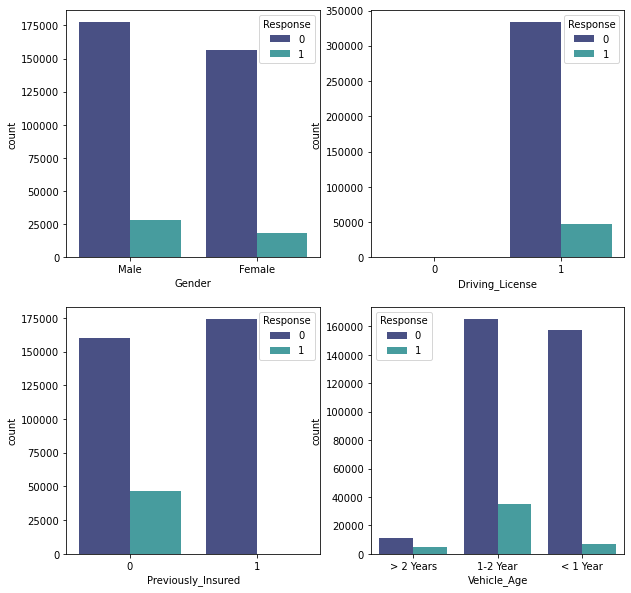

In [8]:
fix, axes = plt.subplots(2, 2, figsize = (10,10))
sns.countplot(ax = axes[0,0], x = 'Gender', hue = 'Response', data = df, palette = 'mako')
sns.countplot(ax = axes[0,1], x = 'Driving_License', hue = 'Response', data = df, palette = 'mako')
sns.countplot(ax = axes[1,0], x = 'Previously_Insured', hue = 'Response', data = df, palette = 'mako')
sns.countplot(ax = axes[1,1], x = 'Vehicle_Age', hue = 'Response', data = df, palette = 'mako')

From the above visualizations, we can make the following inferences -

1. The male customers own slightly more vehicles than thet tend to buy insurance in comparison to their female counterparts.

2. Similarly, the customers who have driving licences will opt for insurance instead of those who don’t have it.

3. The third visualization depicts that the customers want to have only an insurance policy. It means those who already have insurance won’t convert.

4. In the last chart, the customers with vehicle age lesser than the 2 years are more likely to buy insurance.

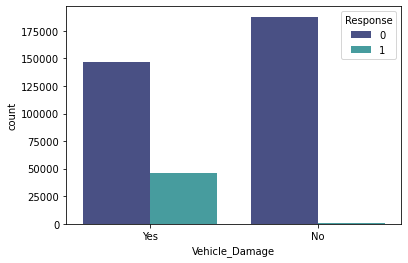

In [9]:
sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = df, palette = 'mako')

From the above plot, we can infer that if the vehicle has been damaged previously then the customer will be more interested in buying the insurance as they know the cost.

It is also important to look at the target column, as it will tell us whether the problem is a balanced or an imbalanced.

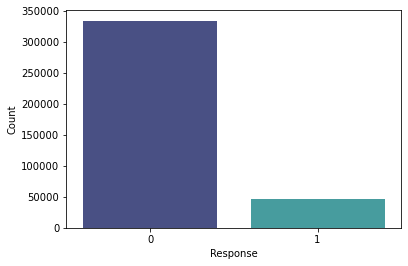

In [10]:
Response = df.loc[:,'Response'].value_counts().rename('Count')
plt.xlabel('Response')
plt.ylabel('Count')
sns.barplot(Response.index, Response.values, palette = 'mako')


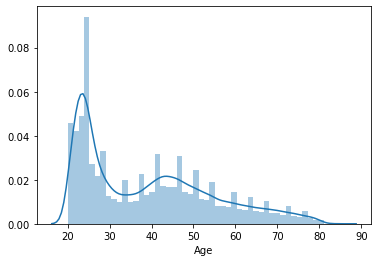

In [13]:
sns.distplot(df['Age'])

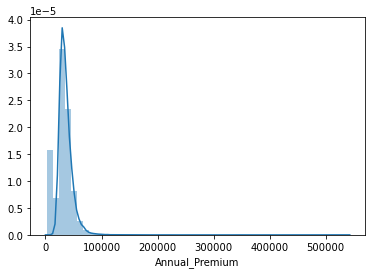

In [14]:
sns.distplot(df['Annual_Premium'])

### Data preprocessing

1. Converting the categorical features into dummies or doing categorical encoding.
2. Binning the numerical features.
3. Dropping the unnecessary columns like ids.

In [15]:
def data_prep(df):
    df = df.drop(columns = ['id', 'Policy_Sales_Channel', 'Vintage'])
    df = pd.get_dummies(df, columns = ['Gender'], prefix = 'Gender')
    df = pd.get_dummies(df, columns = ['Vehicle_Damage'], prefix = 'Damage')
    df = pd.get_dummies(df, columns = ['Driving_License'], prefix = 'License')
    df = pd.get_dummies(df, columns = ['Previously_Insured'], prefix = 'prev_insured')
    df['Age'] = pd.cut(df['Age'], bins = [0,29, 35, 50, 100])
    df['Age']= df['Age'].cat.codes
    df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins = [0, 30000, 35000, 40000, 45000, 50000, np.inf])
    df['Annual_Premium'] = df['Annual_Premium'].cat.codes
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
    df.drop(columns =['Region_Code'], inplace = True)
    return df

df1 = data_prep(df)


    

In [16]:
df1.head()

,Age,Vehicle_Age,Annual_Premium,Response,Gender_Female,Gender_Male,Damage_No,Damage_Yes,License_0,License_1,prev_insured_0,prev_insured_1
0,2,2,3,1,0,1,0,1,0,1,1,0
1,3,1,1,0,0,1,1,0,0,1,1,0
2,2,2,2,1,0,1,0,1,0,1,1,0
3,0,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,1,0,1


### Feature Selection

In [17]:
features = ['Age', 'Vehicle_Age', 'Annual_Premium', 'Gender_Female', 'Gender_Male', 'Damage_No', 'Damage_Yes',
           'License_0', 'License_1', 'prev_insured_0', 'prev_insured_1']

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1[features], df1['Response'],
                                                   test_size = 0.3, random_state = 101)
X_train.shape, X_test.shape

((266776, 11), (114333, 11))

### Handling Class Imbalance using Undersampling data

In [20]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(sampling_strategy = .5, random_state = 3,)
X_train, Y_train = RUS.fit_resample(df1[features], df1['Response'])

### Model Training and Prediction

In [23]:
#using accuracy and F-1 score as performace metrics
#f1 score more significant for imbalanced classification problems
#defining function for models' peroformance measurement
def performance_met(model, X_train, Y_train, X_test, Y_test):
    acc_train= accuracy_score(Y_train, model.predict(X_train))
    f1_train = f1_score(Y_train, model.predict(X_train))
    acc_test = accuracy_score(Y_test, model.predict(X_test))
    f1_test = f1_score(Y_test, model.predict(X_test))
    print('train score: accuracy: {} f1: {}'.format(acc_train, f1_train))
    print('test_score: accuracy: {} f1: {}'.format(acc_test, f1_test))

#### Training 3 models -
1. Logistic Regression
2. Decision Tree
3. Random Forest

In [24]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
performance_met(model, X_train, Y_train, X_test, Y_test)

train score: accuracy: 0.7471847570113466 f1: 0.6866392463845031
test_score: accuracy: 0.7187863521467993 f1: 0.41871564940700023


In [27]:
#Decision Tree
model_DT = DecisionTreeClassifier(random_state = 1)
model_DT.fit(X_train, Y_train)
performance_met(model_DT, X_train, Y_train, X_test, Y_test)

train score: accuracy: 0.7578106044387355 f1: 0.6603414800136111
test_score: accuracy: 0.7739410318980522 f1: 0.43228045512454427


In [29]:
#Random Forest
Forest = RandomForestClassifier(random_state = 1)
Forest.fit(X_train, Y_train)
performance_met(Forest, X_train, Y_train, X_test, Y_test)

train score: accuracy: 0.7578106044387355 f1: 0.6604434305839035
test_score: accuracy: 0.7737573578931717 f1: 0.43215595021184106


We observe low performance from Logistic Regression and significantly higher and simiar performance from Decision Tree and Random Forest models.

### Hyperparameter Tuning

In [30]:
#Using GridSearch for finding best parameters for random forest classifier
rf = RandomForestClassifier(random_state = 1)
parameters = {
    'bootstrap': [True],
    'max_depth': [20,25],
    'min_samples_leaf': [3,4],
    'min_samples_split': [100,300],
}
grid_search_1 = GridSearchCV(rf, parameters, cv = 3, verbose = 2, n_jobs = -1)
grid_search_1.fit(X_train, Y_train)
performance_met(grid_search_1, X_train, Y_train, X_test, Y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
train score: accuracy: 0.7576964247484479 f1: 0.6605889761890482
test_score: accuracy: 0.7736436549377695 f1: 0.4324312469845168
